In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv('database_IND.csv')  # read the data
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
#understand data at high level check the stastics of dataset
data.describe(include='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
count,907,907,907,907,907.000000,861.000000,861.000000,907,198,1,...,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,449,0.0
unique,1,1,907,907,NaN,NaN,NaN,8,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,IND,India,LEIMAKHONG DG,WRI1026654,NaN,NaN,NaN,Coal,Oil,Oil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
freq,907,907,1,1,NaN,NaN,NaN,258,195,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449,NaN
mean,NaN,NaN,NaN,NaN,326.223755,21.197918,77.464907,NaN,NaN,NaN,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,590.085456,6.239612,4.939316,NaN,NaN,NaN,...,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.168900,68.644700,NaN,NaN,NaN,...,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,16.725000,16.773900,74.256200,NaN,NaN,NaN,...,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,59.200000,21.780000,76.719500,NaN,NaN,NaN,...,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,385.250000,25.512400,79.440800,NaN,NaN,NaN,...,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN,NaN


As we see there are null/missing values are present in dataset & most of unnessasary columns are present so lets frist deal with it.

Observations:
    1) null vallues present
    2) most of columns have missing values like other_fuel2	,other_fuel3, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh lets drop frist before dealing with null values.
    3)we have categorical data type(object type)

In [5]:
#first drop unnessesary column then remove duplicates & recheck the size
data=data.drop(columns=['country','country_long','name','latitude', 'longitude','owner','url','wepp_id','gppd_idnr','other_fuel2',
       'other_fuel3','generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh','generation_data_source'],axis=1)

data.drop_duplicates(inplace=True)

print(data.shape)

(857, 12)


In [6]:
# check the no. of rows & column & finding the count of missing value
print(data.isna().sum())

#printing the summary of data type
data.info() 

capacity_mw                0
primary_fuel               0
other_fuel1              659
commissioning_year       333
source                     0
geolocation_source        18
year_of_capacity_data    341
generation_gwh_2014      459
generation_gwh_2015      435
generation_gwh_2016      423
generation_gwh_2017      417
generation_gwh_2018      409
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 905
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            857 non-null    float64
 1   primary_fuel           857 non-null    object 
 2   other_fuel1            198 non-null    object 
 3   commissioning_year     524 non-null    float64
 4   source                 857 non-null    object 
 5   geolocation_source     839 non-null    object 
 6   year_of_capacity_data  516 non-null    float64
 7   generation_gwh_2014    398 non-null    float64
 8   generatio

In [7]:
# Checking null values by other values in target variable
data.loc[data['primary_fuel']==''] 

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018


In [8]:
# Remove null value as we can not fill capacity & fule type by mean mode method as its useless so lets drop the NAN
data=data.dropna()
print(data.shape)
data.head(5)

(168, 12)


,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
4,1800.0,Coal,Oil,2015.0,Central Electricity Authority,WRI,2019.0,3035.550,5916.3700,6243.0000,5385.579736,7279.000
5,250.0,Coal,Oil,2005.0,Central Electricity Authority,WRI,2019.0,1153.421,1208.8520,1175.7650,1147.913000,976.655
9,210.0,Coal,Oil,2008.0,Central Electricity Authority,WRI,2019.0,1887.904,1643.0460,1338.0930,1563.457000,1487.880
10,1350.0,Coal,Oil,2014.0,Central Electricity Authority,WRI,2019.0,1920.971,5629.6630,1701.0080,4350.558000,3717.154
12,1200.0,Coal,Oil,2011.0,Central Electricity Authority,WRI,2019.0,7744.000,8076.8105,7902.0216,7940.740000,7873.973


In [9]:
# lets check again null values
print(data.isna().sum())

capacity_mw              0
primary_fuel             0
other_fuel1              0
commissioning_year       0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64


now our data looks good ,lets move further for preproccesing  & distribution

In [10]:
# lets Check again 
data.describe(include='all')

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,168.000000,168,168,168.000000,168,168,168.0,168.000000,168.000000,168.000000,168.000000,168.000000
unique,NaN,3,3,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Coal,Oil,NaN,Central Electricity Authority,WRI,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,160,166,NaN,168,168,NaN,NaN,NaN,NaN,NaN,NaN
mean,1060.685089,NaN,NaN,2003.904762,NaN,NaN,2019.0,4577.371409,4894.690224,4959.336545,5045.142661,5215.960018
std,880.000525,NaN,NaN,11.130816,NaN,NaN,0.0,5315.190198,5631.588919,5609.097504,5648.606510,5864.148972
min,35.000000,NaN,NaN,1966.000000,NaN,NaN,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,490.000000,NaN,NaN,1996.000000,NaN,NaN,2019.0,1040.711125,1333.724000,1360.466423,1531.967500,1256.375000
50%,920.000000,NaN,NaN,2009.000000,NaN,NaN,2019.0,3071.416000,3503.860500,3384.205250,3558.992500,3293.532000
75%,1340.000000,NaN,NaN,2012.250000,NaN,NaN,2019.0,6166.850000,5992.332875,6170.832500,6339.534675,6824.237500


Now the data looks great & move further n check frequency of each class.

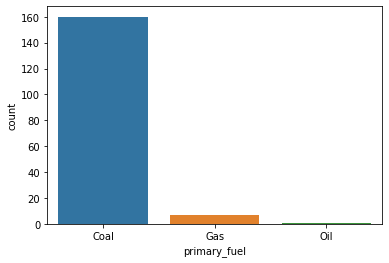

In [11]:
#plot each class frequency
sns.countplot(x='primary_fuel',data=data)
plt.show()

In [12]:
print(data['primary_fuel'].value_counts())

Coal    160
Gas       7
Oil       1
Name: primary_fuel, dtype: int64


From above graph and count value method it is clear that there is data imbalance in target variable.

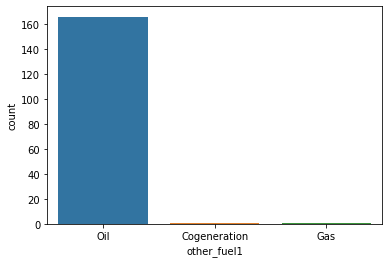

In [13]:
sns.countplot(x='other_fuel1',data=data)
plt.show()

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

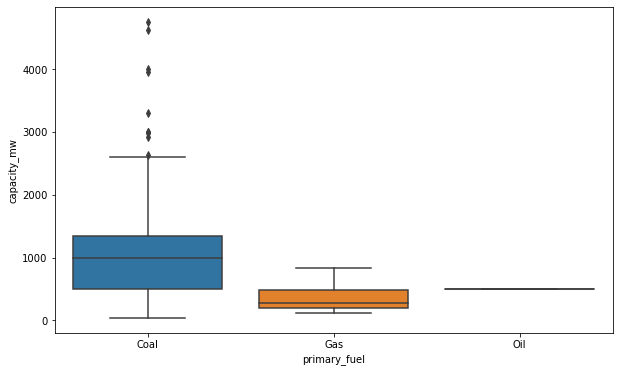

In [14]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.boxplot(y ='capacity_mw', x ='primary_fuel', data = data)

As we see oil has very less contribution in genrating capacity mw and in coal primary fule we have outliers

<AxesSubplot:xlabel='other_fuel1', ylabel='capacity_mw'>

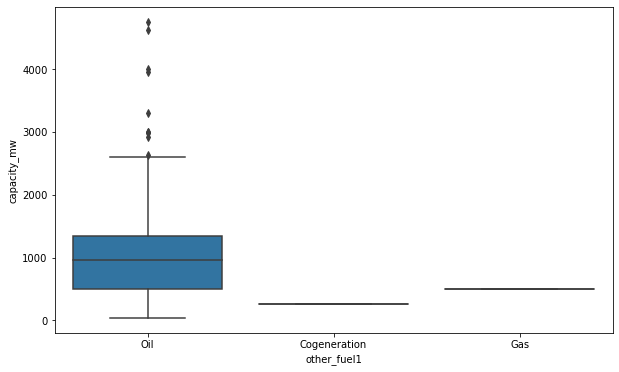

In [15]:
#Bivariant graph lets check between other fule and capacity mw
plt.figure(figsize =(10, 6))
sns.boxplot(y ='capacity_mw', x ='other_fuel1', data = data)

in this graph we can see there is contribution of oil in genration of capacity mw

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

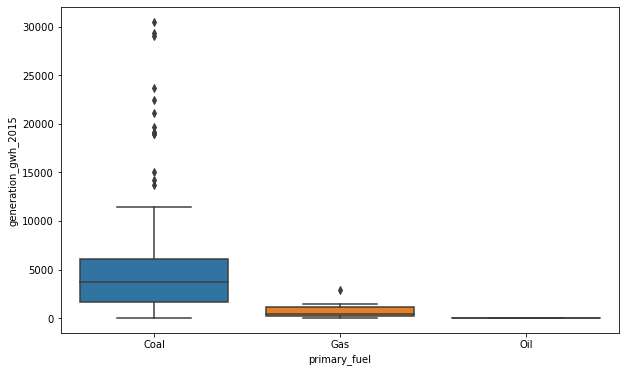

In [16]:
# Lets check the relation between target & independent variable
plt.figure(figsize =(10, 6))
sns.boxplot(y ='generation_gwh_2015', x ='primary_fuel', data = data)

Genration grouth in type 2 primary fule is very low than the other lets check for the grouth

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

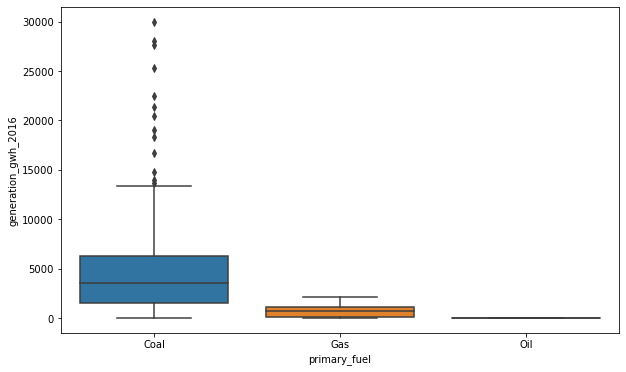

In [17]:
# Lets check the relation between target & independent variable
plt.figure(figsize =(10, 6))
sns.boxplot(y ='generation_gwh_2016', x ='primary_fuel', data = data)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

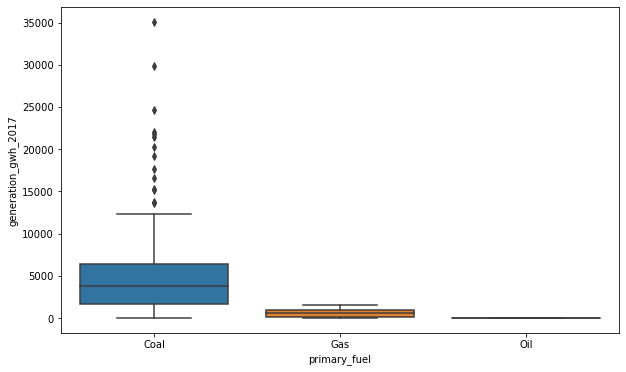

In [18]:
# Lets check the relation between target & independent variable
plt.figure(figsize =(10, 6))
sns.boxplot(y ='generation_gwh_2017', x ='primary_fuel', data = data)

as we see ther is no diffrance in between 2015,2016 and 2017 genration grouth

Now our data looks great lets move further for preprocessing step by using encoding tech 

In [19]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

As our frist target is primary fule so for the prediction we will convert object in to int by using lable encoder and other_fuel1 by get dummies method

In [20]:
label = LabelEncoder()
df=label.fit_transform(data["primary_fuel"]) # Encoding 
pd.Series(df)
data["primary_fuel"]=df # save

In [21]:
df=label.fit_transform(data["geolocation_source"]) #Encoding
pd.Series(df)
data["geolocation_source"]=df #save

In [22]:
df=label.fit_transform(data["source"]) #Encoding
pd.Series(df)
data["source"]=df #Save

In [23]:
df_dummies=pd.get_dummies(data['other_fuel1'],drop_first=True) #Encoing by using get_dummies
print(df_dummies.head(2))
print(df_dummies.shape)
data=data.join(df_dummies) #join to orignal dataset

   Gas  Oil
4    0    1
5    0    1
(168, 2)


In [24]:
data=data.drop(columns='other_fuel1',axis=1) # Droping orignal column

In [25]:
data.head(3) # check the data again after droping & encoding

,capacity_mw,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Gas,Oil
4,1800.0,0,2015.0,0,0,2019.0,3035.550,5916.370,6243.000,5385.579736,7279.000,0,1
5,250.0,0,2005.0,0,0,2019.0,1153.421,1208.852,1175.765,1147.913000,976.655,0,1
9,210.0,0,2008.0,0,0,2019.0,1887.904,1643.046,1338.093,1563.457000,1487.880,0,1


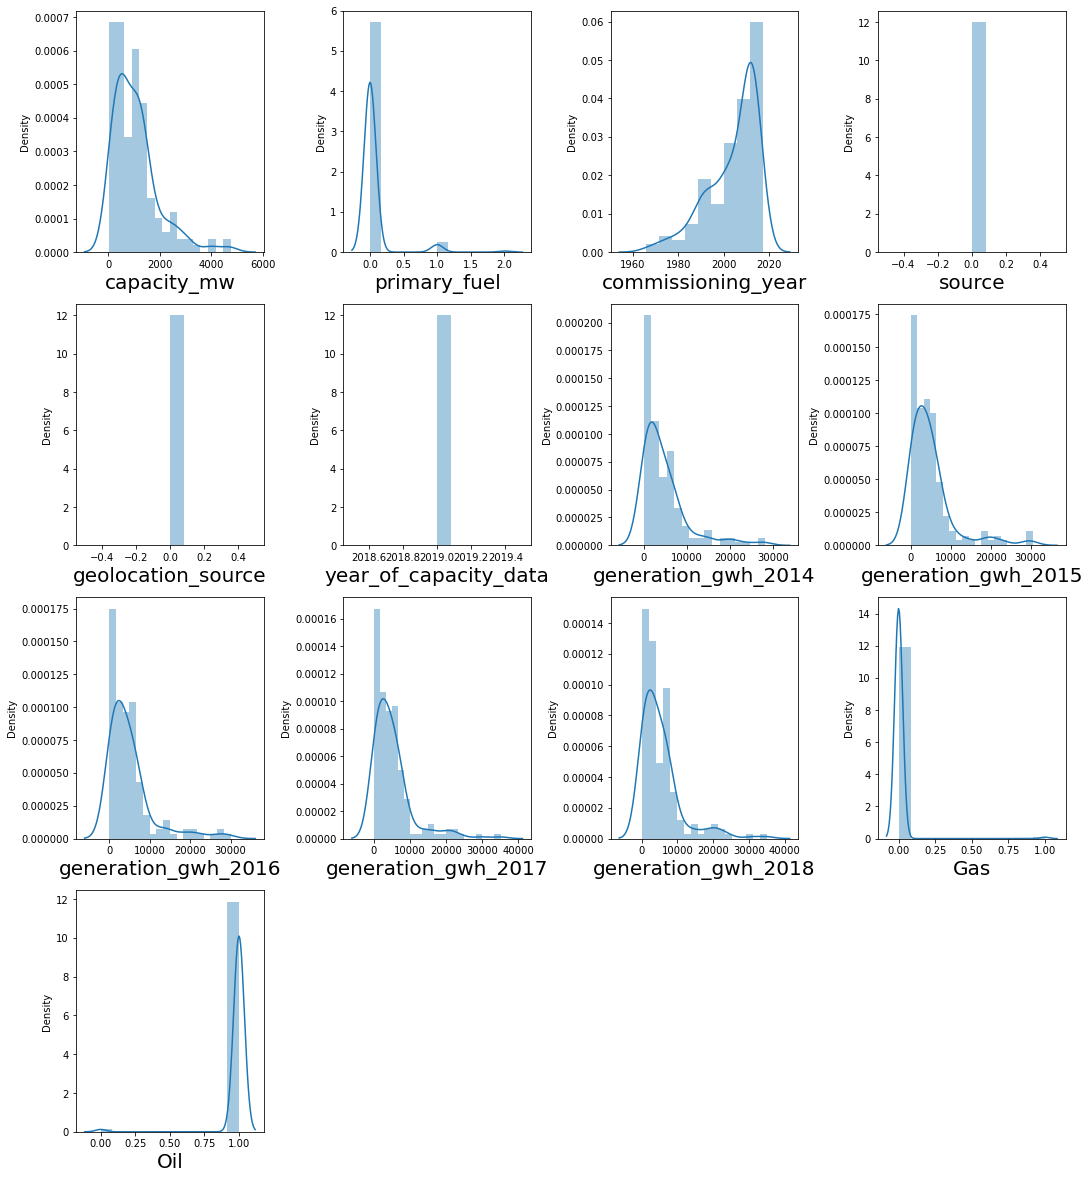

In [26]:
#lets see the distrubution 
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [27]:
#from above graph we can see all the columns are left or right skewed so lets check it by using value by setting target +0.5/-0.5 pvalue
data.skew()

capacity_mw               1.655711
primary_fuel              5.093202
commissioning_year       -1.167604
source                    0.000000
geolocation_source        0.000000
year_of_capacity_data     0.000000
generation_gwh_2014       2.232511
generation_gwh_2015       2.474968
generation_gwh_2016       2.357576
generation_gwh_2017       2.481239
generation_gwh_2018       2.327765
Gas                      12.961481
Oil                      -9.081960
dtype: float64

we can see from above distribusion columns 'capacity_mw','generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018', 'Gas',are rightskwed data & other like 'oil','commissioning_year' are leftskwed data so lets remove frist skweness for data by using power transformation

In [28]:
from sklearn.preprocessing import PowerTransformer

fetures=['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Gas','Oil','commissioning_year']
pt=PowerTransformer()
data[fetures]=pt.fit_transform(data[fetures].values)

In [29]:
data[fetures]

,capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Gas,Oil,commissioning_year
4,0.976813,0.081528,0.547039,0.582767,0.425474,0.677195,-0.077382,0.109764,1.141055
5,-1.120677,-0.524027,-0.606771,-0.653821,-0.653606,-0.695002,-0.077382,0.109764,-0.019388
9,-1.253777,-0.238489,-0.427507,-0.580167,-0.480231,-0.477318,-0.077382,0.109764,0.301294
10,0.590480,-0.227604,0.501243,-0.435003,0.241201,0.114351,-0.077382,0.109764,1.012705
12,0.441484,0.869911,0.851413,0.817865,0.796510,0.751491,-0.077382,0.109764,0.644796
...,...,...,...,...,...,...,...,...,...
877,-0.518186,0.171646,-0.060848,0.043680,-0.086722,-0.051394,-0.077382,0.109764,0.413183
880,2.552821,2.383031,2.481601,2.549522,2.760831,2.601930,-0.077382,0.109764,-0.318734
889,0.701460,0.739918,0.422952,0.085388,0.673218,0.715558,-0.077382,0.109764,-1.608518
890,-0.443376,-0.575734,-0.424482,-0.628729,-0.725816,-0.713130,-0.077382,0.109764,0.527664


In [30]:
data.head()

,capacity_mw,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Gas,Oil
4,0.976813,0,1.141055,0,0,2019.0,0.081528,0.547039,0.582767,0.425474,0.677195,-0.077382,0.109764
5,-1.120677,0,-0.019388,0,0,2019.0,-0.524027,-0.606771,-0.653821,-0.653606,-0.695002,-0.077382,0.109764
9,-1.253777,0,0.301294,0,0,2019.0,-0.238489,-0.427507,-0.580167,-0.480231,-0.477318,-0.077382,0.109764
10,0.590480,0,1.012705,0,0,2019.0,-0.227604,0.501243,-0.435003,0.241201,0.114351,-0.077382,0.109764
12,0.441484,0,0.644796,0,0,2019.0,0.869911,0.851413,0.817865,0.796510,0.751491,-0.077382,0.109764


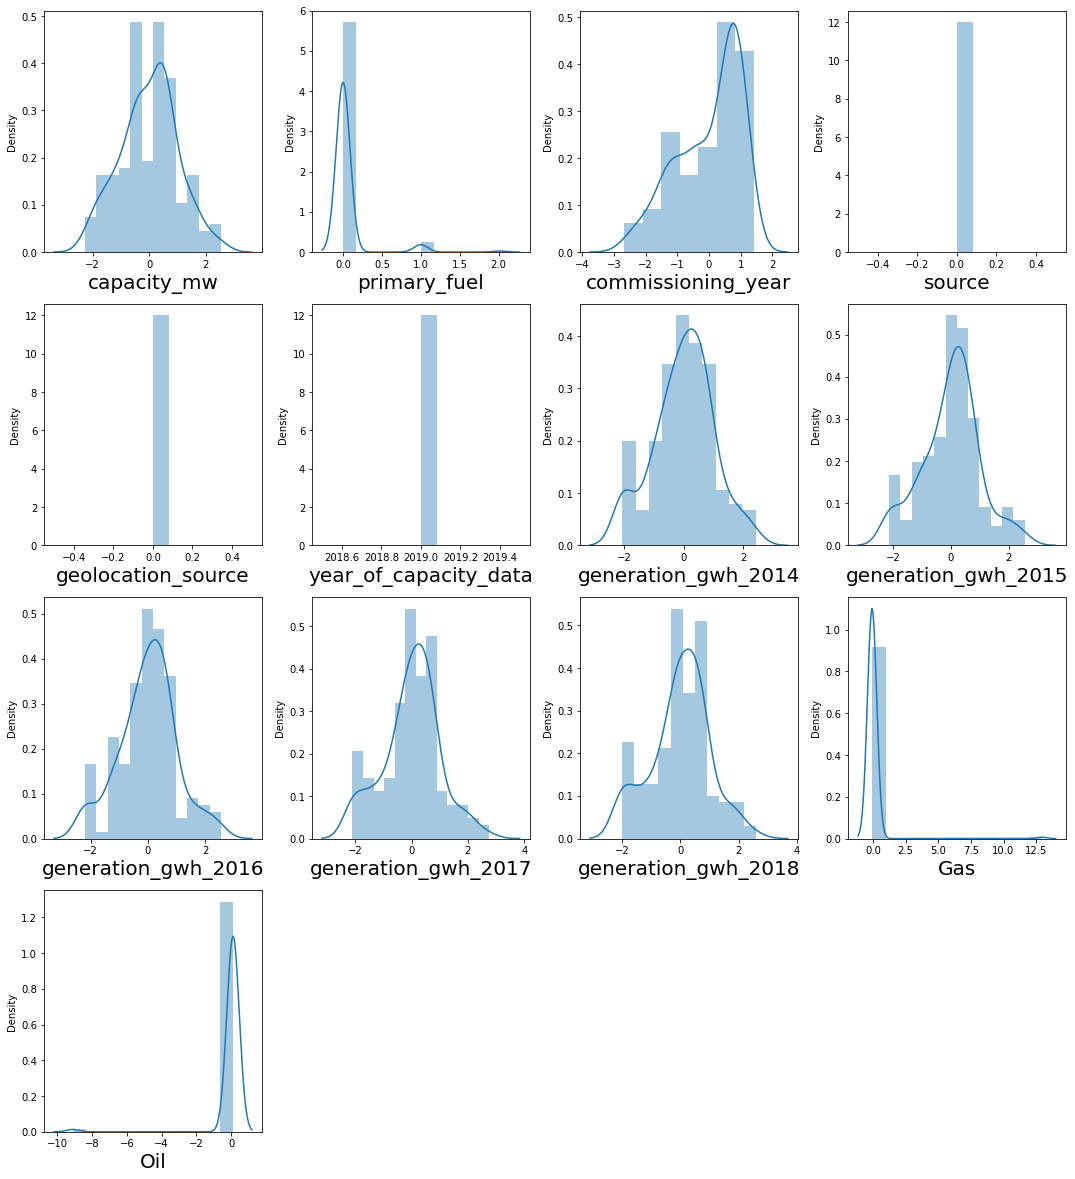

In [31]:
#lets see the distrubution after transformation
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

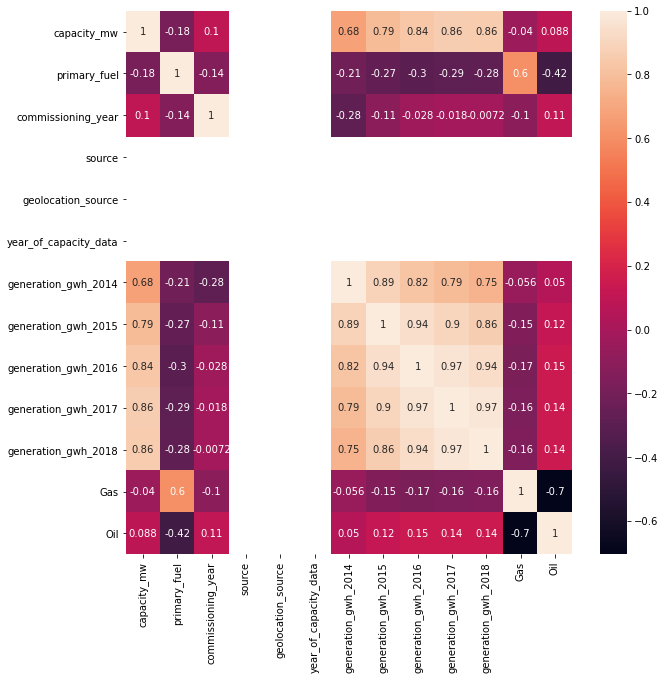

In [32]:
#check multicolinearity
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

From above heatmap it is clear that there is corelation between independent variables lets check with VIF method also.
and we see there is no values for 'source','geolocation_source', 'year_of_capacity_data' so lets drop while seaprate the data.

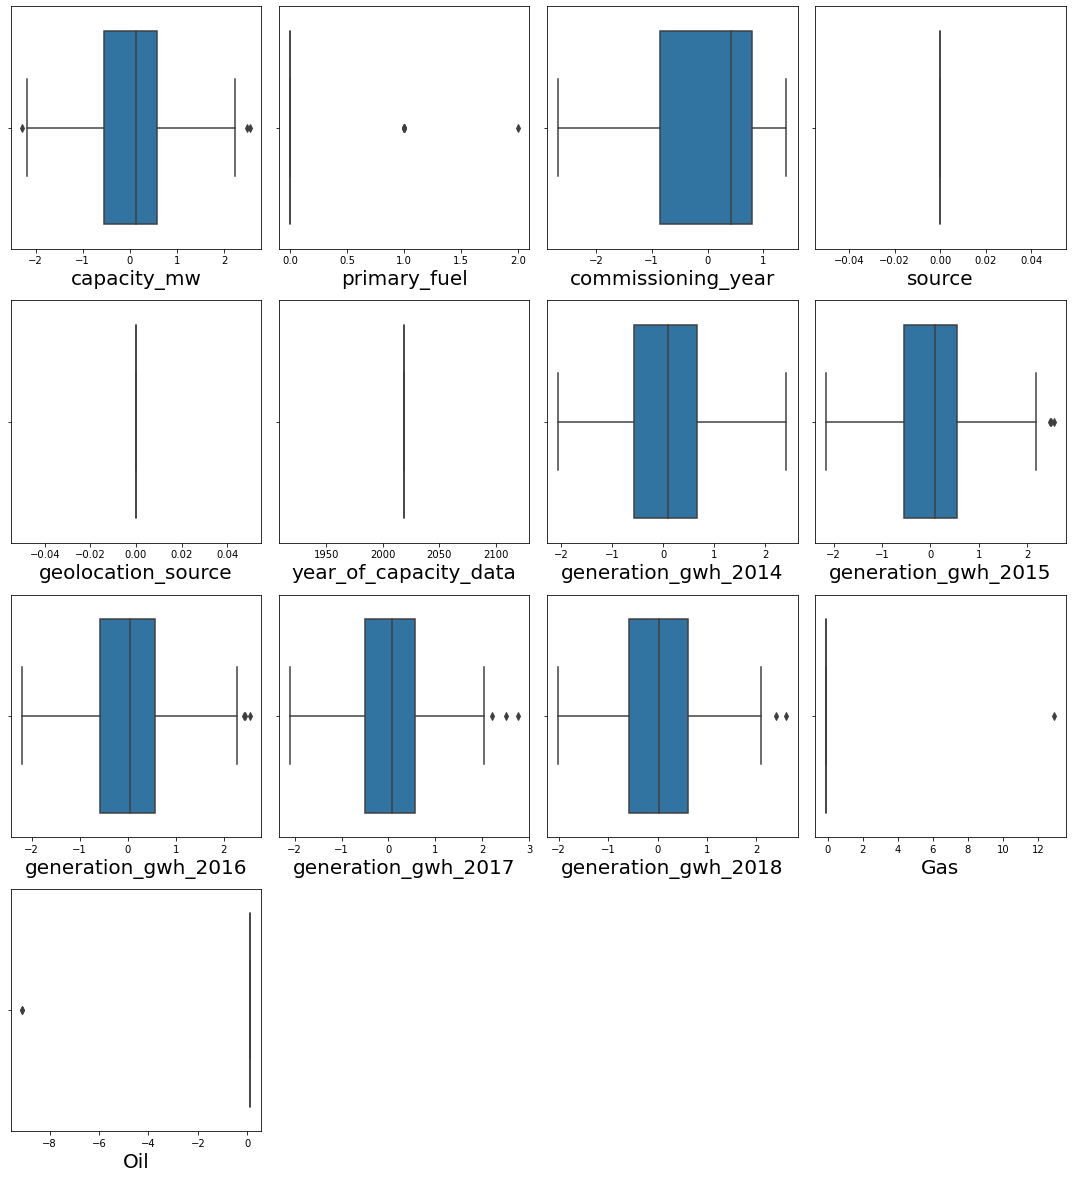

In [33]:
#lets see the distrubution for the outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

As we see there are outliers present in the almost all columns but as we have very less data to predict the data we cant loose more data so i m proceding further to build model without using outliers

In [34]:
# Let's Seperate the data 
x=data.drop(columns=['primary_fuel','source','geolocation_source', 'year_of_capacity_data'])
y=data['primary_fuel']

In [35]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)
x_scaled

array([[ 0.97681324,  1.14105474,  0.08152779, ...,  0.67719512,
        -0.07738232,  0.10976426],
       [-1.12067667, -0.01938774, -0.52402732, ..., -0.69500198,
        -0.07738232,  0.10976426],
       [-1.25377651,  0.30129368, -0.23848896, ..., -0.47731846,
        -0.07738232,  0.10976426],
       ...,
       [ 0.70146025, -1.60851824,  0.73991842, ...,  0.71555849,
        -0.07738232,  0.10976426],
       [-0.44337629,  0.52766371, -0.5757336 , ..., -0.71313025,
        -0.07738232,  0.10976426],
       [-0.33817309,  0.1919396 ,  0.11879063, ..., -0.03135951,
        -0.07738232,  0.10976426]])

This is how our data looks like after standarization/ scalling, now we will check multicolinearity using VIF

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
vif

,vif,featurs
0,4.581917,capacity_mw
1,1.353074,commissioning_year
2,6.095529,generation_gwh_2014
3,15.723426,generation_gwh_2015
4,26.634499,generation_gwh_2016
5,36.440921,generation_gwh_2017
6,20.132531,generation_gwh_2018
7,2.144735,Gas
8,2.016532,Oil


As we see there is vif values more than 10 as per thumb rule we should delete the columns but as we have very less data so i am not deleting any columns and moving further.

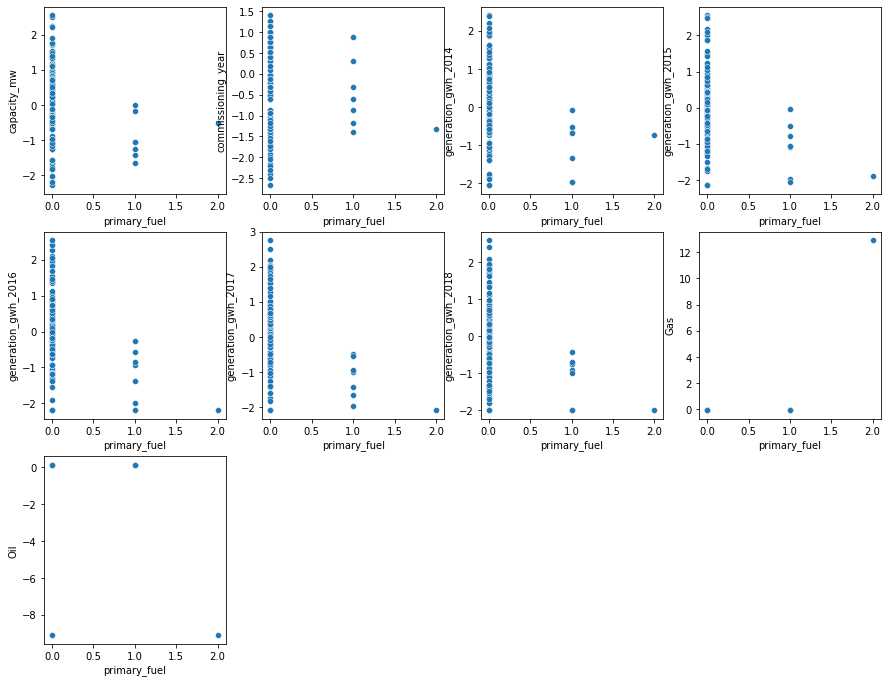

In [37]:
# see how featurs r related to lable(Graphical Univariate Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.scatterplot(y,x[column])
    plotnumber+=1
plt.show()

In [38]:
#Split data into train & test by using this new fetures
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=355)

# Build Model to predict primary fule 

In [39]:
def print_score(model,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=model.predict(x_train)
        print("Train Report:",accuracy_score(y_train,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",accuracy_score(y_test,pred))
        print("Classification Report:",classification_report(y_test,pred))
        print("Confusion Matrix:",confusion_matrix(y_test,pred))

In [40]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

def model_accuracy(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [41]:
#Model no.1
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)

print_score(dt,x_train,x_test,y_train,y_test,train=True)
print_score(dt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(dt)

Train Report: 1.0
Test Report: 0.9411764705882353
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.96      0.97        49
           1       0.33      0.50      0.40         2

    accuracy                           0.94        51
   macro avg       0.66      0.73      0.68        51
weighted avg       0.95      0.94      0.95        51

Confusion Matrix: [[47  2]
 [ 1  1]]
Accuracy: 85.51 %
Standard Deviation: 4.15 %


In [42]:
# Model no.2
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(x_train,y_train)

print_score(LR,x_train,x_test,y_train,y_test,train=True)
print_score(LR,x_train,x_test,y_train,y_test,train=False)
model_accuracy(LR)

Train Report: 0.9572649572649573
Test Report: 0.9607843137254902
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       0.00      0.00      0.00         2

    accuracy                           0.96        51
   macro avg       0.48      0.50      0.49        51
weighted avg       0.92      0.96      0.94        51

Confusion Matrix: [[49  0]
 [ 2  0]]
Accuracy: 93.18 %
Standard Deviation: 1.65 %


In [43]:
# Model no.3
from sklearn.ensemble import RandomForestClassifier

rand_clf= RandomForestClassifier()
rand_clf.fit(x_train,y_train)

print_score(rand_clf,x_train,x_test,y_train,y_test,train=True)
print_score(rand_clf,x_train,x_test,y_train,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 1.0
Test Report: 0.9607843137254902
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       0.00      0.00      0.00         2

    accuracy                           0.96        51
   macro avg       0.48      0.50      0.49        51
weighted avg       0.92      0.96      0.94        51

Confusion Matrix: [[49  0]
 [ 2  0]]
Accuracy: 93.18 %
Standard Deviation: 1.65 %


In [44]:
# Model no.4
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)
model_accuracy(svc)


Train Report: 0.9572649572649573
Test Report: 0.9607843137254902
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       0.00      0.00      0.00         2

    accuracy                           0.96        51
   macro avg       0.48      0.50      0.49        51
weighted avg       0.92      0.96      0.94        51

Confusion Matrix: [[49  0]
 [ 2  0]]
Accuracy: 94.87 %
Standard Deviation: 0.04 %


In [45]:
#Model no.5
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train,y_train)

print_score(knn,x_train,x_test,y_train,y_test,train=True)
print_score(knn,x_train,x_test,y_train,y_test,train=False)
model_accuracy(knn)

Train Report: 0.9487179487179487
Test Report: 0.9607843137254902
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       0.00      0.00      0.00         2

    accuracy                           0.96        51
   macro avg       0.48      0.50      0.49        51
weighted avg       0.92      0.96      0.94        51

Confusion Matrix: [[49  0]
 [ 2  0]]
Accuracy: 94.87 %
Standard Deviation: 0.04 %


# Looking at accuracy & confusion matrix i m selecting SVC by using Kfold cross validation method

In [46]:
#save model
import pickle
Filename='Global_power_Finalized_model.pickle'
pickle.dump(svc,open(Filename,'wb'))

# Capacity MW Prediction Models

In [47]:
# Let's Seperate the data 
x=data.drop(columns=['capacity_mw','source','geolocation_source','year_of_capacity_data'])
y=data['capacity_mw']

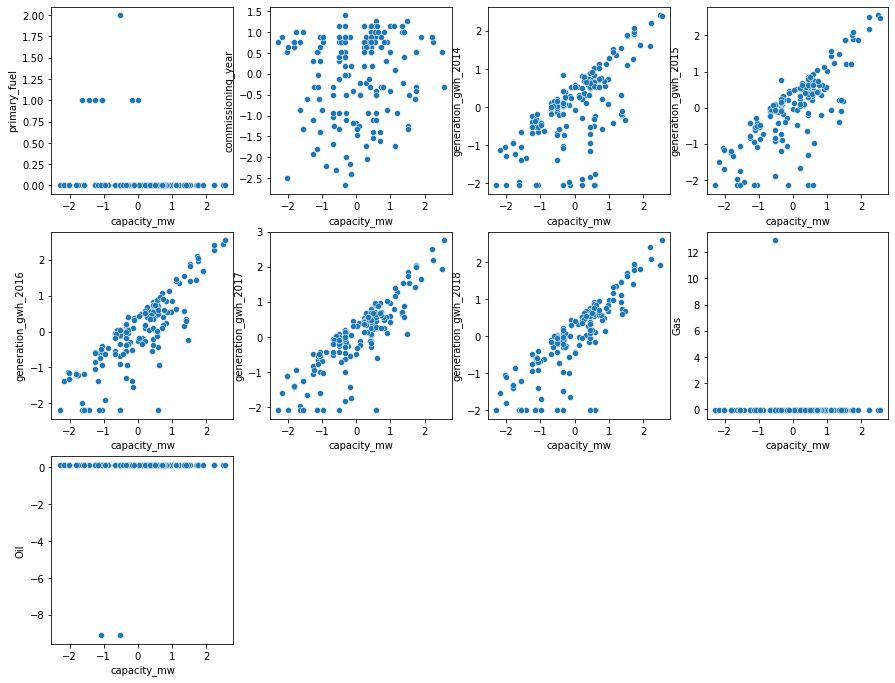

In [48]:
# see how featurs r related to lable(Graphical Univariate Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.scatterplot(y,x[column])
    plotnumber+=1
plt.show()

In [49]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [50]:
#Split data into train & test by using this new fetures
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=958)

In [51]:
def print_score1(model,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=model.predict(x_train)
        print("Train Report:",r2_score(y_train,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",r2_score(y_test,pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
        print("MAE:",mean_absolute_error(y_test,pred))
        print("MSE:",mean_squared_error(y_test,pred))

In [52]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.

from sklearn.model_selection import cross_val_score
def model_accuracy1(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [53]:
# Model no.1
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

lcv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lcv.fit(x_train,y_train)
alpha=lcv.alpha_
print(alpha)
Lasso_reg=Lasso(alpha).fit(x_train,y_train)

print_score1(Lasso_reg,x_train,x_test,y_train,y_test,train=True)
print_score1(Lasso_reg,x_train,x_test,y_train,y_test,train=False)
model_accuracy1(Lasso_reg)

0.00495898346340803
Train Report: 0.7718827290983201
Test Report: 0.787070626691266
RMSE: 0.4335427875957919
MAE: 0.3499547492500928
MSE: 0.18795934867632993
Accuracy: 72.73 %
Standard Deviation: 3.18 %


In [54]:
# Model no.2
from sklearn.ensemble import RandomForestRegressor

rand_regressor= RandomForestRegressor()
rand_regressor.fit(x_train,y_train)

print_score1(rand_regressor,x_train,x_test,y_train,y_test,train=True)
print_score1(rand_regressor,x_train,x_test,y_train,y_test,train=False)
model_accuracy1(rand_regressor)

Train Report: 0.967657814574212
Test Report: 0.8886349890473763
RMSE: 0.31353682762510177
MAE: 0.22530987117194257
MSE: 0.09830534227721278
Accuracy: 74.88 %
Standard Deviation: 1.47 %


In [55]:
# Model no.3
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

print_score1(xgb,x_train,x_test,y_train,y_test,train=True)
print_score1(xgb,x_train,x_test,y_train,y_test,train=False)
model_accuracy1(xgb)

Train Report: 0.9999988133279241
Test Report: 0.8671249962473292
RMSE: 0.34248047933576914
MAE: 0.2501750752413834
MSE: 0.1172928787260582
Accuracy: 70.23 %
Standard Deviation: 3.84 %


In [56]:
#Model no.4
from sklearn.ensemble import GradientBoostingRegressor

gbdt=GradientBoostingRegressor()

gbdt.fit(x_train,y_train)

print_score1(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score1(gbdt,x_train,x_test,y_train,y_test,train=False)
model_accuracy1(gbdt)

Train Report: 0.9868777187063521
Test Report: 0.8689251390539089
RMSE: 0.34015266712230113
MAE: 0.2545532250463916
MSE: 0.115703836950415
Accuracy: 68.24 %
Standard Deviation: 5.44 %


In [57]:
#Model no.5
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(x_train,y_train)

print_score1(dt,x_train,x_test,y_train,y_test,train=True)
print_score1(dt,x_train,x_test,y_train,y_test,train=False)
model_accuracy1(dt)

Train Report: 1.0
Test Report: 0.7528242820871459
RMSE: 0.46710775747588174
MAE: 0.31749640387752615
MSE: 0.21818965709414714
Accuracy: 56.96 %
Standard Deviation: 12.36 %


In [58]:
#Model no.6
from sklearn.ensemble import BaggingRegressor

bb=BaggingRegressor()

bb.fit(x_train,y_train)

print_score1(bb,x_train,x_test,y_train,y_test,train=True)
print_score1(bb,x_train,x_test,y_train,y_test,train=False)
model_accuracy1(bb)

Train Report: 0.954544180626764
Test Report: 0.8756907982274186
RMSE: 0.3312575737682077
MAE: 0.23179237194429944
MSE: 0.10973158017879957
Accuracy: 72.21 %
Standard Deviation: 3.08 %


In [60]:
# Hyper tuning by using GridSearchCV with RandomForestRegressor
from sklearn.model_selection import GridSearchCV

para={'max_depth':range(0,12,2),'ccp_alpha':[0.25,0.1,0.01],'n_estimators':[20,50,70],'max_samples':range(1,14)}
grid=GridSearchCV(estimator=rand_regressor, param_grid=para,cv=2)
grid.fit(x_train,y_train)

grid.best_params_

{'ccp_alpha': 0.01, 'max_depth': 6, 'max_samples': 13, 'n_estimators': 70}

In [101]:
rand_regressor= RandomForestRegressor(ccp_alpha= 0.01,max_depth=20, max_samples=13, n_estimators=72)
rand_regressor.fit(x_train,y_train)

print_score1(rand_regressor,x_train,x_test,y_train,y_test,train=True)
print_score1(rand_regressor,x_train,x_test,y_train,y_test,train=False)
model_accuracy1(rand_regressor)

Train Report: 0.7839772419534852
Test Report: 0.824548454903853
RMSE: 0.3935435295521833
MAE: 0.2922835929281763
MSE: 0.1548765096523902
Accuracy: 74.34 %
Standard Deviation: 2.72 %


In [102]:
# Hyper tuning by using RandomizedSearchCV With RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


para={'n_estimators':range(0,100,4),'random_state':[40,60,20,30],'max_depth':range(0,12,2),'ccp_alpha':[0.25,0.1,0.01]}
rand=RandomizedSearchCV(estimator=rand_regressor, cv=2,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'random_state': 40, 'n_estimators': 72, 'max_depth': 4, 'ccp_alpha': 0.01}

In [111]:
rand_regressor= RandomForestRegressor(ccp_alpha= 0.001,max_depth=5, random_state=40, n_estimators=72)
rand_regressor.fit(x_train,y_train)

print_score1(rand_regressor,x_train,x_test,y_train,y_test,train=True)
print_score1(rand_regressor,x_train,x_test,y_train,y_test,train=False)
model_accuracy1(rand_regressor)

Train Report: 0.9403670062449054
Test Report: 0.8901397515435465
RMSE: 0.31141137076951664
MAE: 0.226710386561462
MSE: 0.09697704184454937
Accuracy: 76.05 %
Standard Deviation: 1.40 %


# Looking at accuracy & MSE i m selecting RandomForestRegressor with RandomizedSearchCV hypertune parameter by using Kfold cross validation method

In [112]:
#save model
import pickle
Filename='Global_power_Finalized_model1.pickle'
pickle.dump(svc,open(Filename,'wb'))